# Importing the Data and Modifying It for ML

In [1]:
import numpy as np
import pandas as pd
from collections import Counter

In [2]:
relief = pd.read_csv('ReliefPitching_CLEAN.csv', float_precision = 'round_trip')
relief

,Year,Tm,G,GR,GF,Wgr,Lgr,SVOpp,SV,BSv,...,Bhd,Runr,Empt,>3o,<3o,IPmult,0DR,Out/GR,Pit/GR,Playoff
0,2000,Anaheim Angels,162,441,157,29,24,68,46,22,...,201,168,273,169,124,186,95,3.8,21,0
1,2000,Arizona Diamondbacks,162,390,146,23,24,56,38,18,...,169,129,261,120,111,140,72,3.4,19,0
2,2000,Atlanta Braves,162,376,149,19,18,67,53,14,...,142,112,264,91,101,95,81,3.2,18,1
3,2000,Baltimore Orioles,162,396,148,22,21,57,33,24,...,166,145,251,99,125,119,84,3.3,19,0
4,2000,Boston Red Sox,162,425,155,29,23,66,46,20,...,173,137,288,181,91,191,80,4.0,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,2021,St. Louis Cardinals,162,557,159,36,25,71,50,21,...,217,167,390,123,148,155,99,3.1,18,1
626,2021,Tampa Bay Rays,162,531,161,58,32,64,42,22,...,134,126,405,182,89,198,73,4.0,21,1
627,2021,Texas Rangers,162,507,162,27,31,51,31,20,...,269,143,364,144,98,162,50,3.7,21,0
628,2021,Toronto Blue Jays,162,537,161,30,31,52,34,18,...,208,167,370,136,136,167,63,3.2,18,0


In [3]:
MLrelief = relief.drop(['Year', 'Tm', 'G'], axis = 1)
MLrelief.head()

,GR,GF,Wgr,Lgr,SVOpp,SV,BSv,SV%,SVSit,Hold,...,Bhd,Runr,Empt,>3o,<3o,IPmult,0DR,Out/GR,Pit/GR,Playoff
0,441,157,29,24,68,46,22,0.68,132,60,...,201,168,273,169,124,186,95,3.8,21,0
1,390,146,23,24,56,38,18,0.68,97,39,...,169,129,261,120,111,140,72,3.4,19,0
2,376,149,19,18,67,53,14,0.79,130,56,...,142,112,264,91,101,95,81,3.2,18,1
3,396,148,22,21,57,33,24,0.58,128,68,...,166,145,251,99,125,119,84,3.3,19,0
4,425,155,29,23,66,46,20,0.70,117,49,...,173,137,288,181,91,191,80,4.0,21,0


# Importing and Modifying 2022 Data

In [4]:
relief2022 = pd.read_csv('Relief2022_7-26-22.txt')
relief2022

,Tm,G,GR,GF,Wgr,Lgr,SVOpp,SV,BSv,SV%,...,Tie,Bhd,Runr,Empt,>3o,<3o,IPmult,0DR,Out/GR,Pit/GR
0,Arizona Diamondbacks,96,330,96,17,24,33,19,14,58%,...,64,133,87,243,61,91,84,61,3.1,17
1,Atlanta Braves,98,308,98,18,13,53,34,19,64%,...,35,101,85,223,63,57,71,38,3.4,19
2,Baltimore Orioles,96,334,96,25,20,35,26,9,74%,...,61,135,122,212,116,84,135,49,3.5,19
3,Boston Red Sox,97,360,94,22,19,41,20,21,49%,...,57,146,108,252,79,102,97,74,3.2,18
4,Chicago Cubs,96,327,96,20,21,38,21,17,55%,...,60,149,99,228,97,63,108,57,3.7,21
5,Chicago White Sox,96,337,96,20,12,42,27,15,64%,...,36,144,89,248,69,69,80,60,3.3,19
6,Cincinnati Reds,95,339,94,17,13,31,18,13,58%,...,37,197,96,243,71,71,82,41,3.1,19
7,Cleveland Guardians,95,292,94,25,13,34,23,11,68%,...,49,128,80,212,61,62,70,40,3.2,17
8,Colorado Rockies,97,304,96,17,17,37,28,9,76%,...,56,131,80,224,67,53,73,52,3.4,19
9,Detroit Tigers,97,344,97,20,16,30,23,7,77%,...,38,184,66,278,71,58,75,42,3.3,18


In [5]:
relief2022.drop('1stIP', axis = 1, inplace = True)
relief2022['SV%'] = relief2022['SV%'].str.extract('(\d+)%').astype('int') / 100
relief2022['IS%'] = relief2022['IS%'].str.extract('(\d+)%').astype('int') / 100

In [6]:
logi_ix = [col not in ['Tm', 'G', 'SV%', 'IS%', 'aLi', 'Out/GR', 'Pit/GR'] for col in relief2022.columns]
for col in relief2022.columns[logi_ix]:
    relief2022[col] = relief2022[col] * (162 / relief2022.G)

In [7]:
relief2022.head()

,Tm,G,GR,GF,Wgr,Lgr,SVOpp,SV,BSv,SV%,...,Tie,Bhd,Runr,Empt,>3o,<3o,IPmult,0DR,Out/GR,Pit/GR
0,Arizona Diamondbacks,96,556.875000,162.000000,28.687500,40.500000,55.687500,32.062500,23.625000,0.58,...,108.000000,224.437500,146.812500,410.062500,102.937500,153.562500,141.750000,102.937500,3.1,17
1,Atlanta Braves,98,509.142857,162.000000,29.755102,21.489796,87.612245,56.204082,31.408163,0.64,...,57.857143,166.959184,140.510204,368.632653,104.142857,94.224490,117.367347,62.816327,3.4,19
2,Baltimore Orioles,96,563.625000,162.000000,42.187500,33.750000,59.062500,43.875000,15.187500,0.74,...,102.937500,227.812500,205.875000,357.750000,195.750000,141.750000,227.812500,82.687500,3.5,19
3,Boston Red Sox,97,601.237113,156.989691,36.742268,31.731959,68.474227,33.402062,35.072165,0.49,...,95.195876,243.835052,180.371134,420.865979,131.938144,170.350515,162.000000,123.587629,3.2,18
4,Chicago Cubs,96,551.812500,162.000000,33.750000,35.437500,64.125000,35.437500,28.687500,0.55,...,101.250000,251.437500,167.062500,384.750000,163.687500,106.312500,182.250000,96.187500,3.7,21


In [8]:
MLrelief2022 = relief2022.drop(['Tm', 'G'], axis = 1)

In [9]:
print(MLrelief.shape)
print(MLrelief2022.shape)

(630, 29)
(30, 28)


In [10]:
X = MLrelief.drop('Playoff', axis = 1)
Y = MLrelief.Playoff

# Logistic Regression

Logistic Regression is a linear model where the output is classification for a categorical variable rather than a numeric value for a continuous variable. It does this by estimating the probability of an event using log odds, and rounding to either 0 or 1 (success or failure).

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from IPython.display import clear_output

/Users/vincentfront/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [12]:
LR_accuracy_scores = []
LR_playoff_team_counter = Counter()
LR_model = LogisticRegression(max_iter = 10000)
LR_iterations = 50 

for iteration in range(LR_iterations):
    if iteration % 10 == 0:
        clear_output(wait = True)
        print(f'Started iteration {iteration}')
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y)
    LR_model.fit(Xtrain, Ytrain)
    
    predicted = LR_model.predict(Xtest)
    LR_accuracy_scores.append(metrics.accuracy_score(predicted, Ytest))
    
    predictions_2022 = LR_model.predict(MLrelief2022)
    playoff_teams_2022 = relief2022.Tm[predictions_2022 == 1]
    LR_playoff_team_counter.update(list(playoff_teams_2022))

Started iteration 40


In [13]:
LR_accuracy_scores = pd.Series(LR_accuracy_scores)
LR_accuracy_scores.describe()

count    50.000000
mean      0.878987
std       0.029148
min       0.797468
25%       0.860759
50%       0.882911
75%       0.903481
max       0.936709
dtype: float64

In [14]:
LR_predictions = pd.Series([count / LR_iterations for count in LR_playoff_team_counter.values()], 
                           index = LR_playoff_team_counter.keys()
                          ).sort_values(ascending = False)
LR_predictions

Atlanta Braves         1.00
Houston Astros         1.00
Los Angeles Dodgers    1.00
Milwaukee Brewers      1.00
Minnesota Twins        1.00
New York Mets          1.00
New York Yankees       1.00
St. Louis Cardinals    0.86
Seattle Mariners       0.78
San Diego Padres       0.76
Cleveland Guardians    0.60
Tampa Bay Rays         0.38
dtype: float64

In [15]:
len(LR_predictions)

12

# Decsion Tree Classifier

Decision trees make decision rules, or questions, based on features found in the data, and predicts the class of the data depending on what the answers are to those quesions. Decision trees use algorithims in the background to help develop the questions and decided whether to break up each question into more quesions (or nodes).

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
DTC_accuracy_scores = []
DTC_playoff_team_counter = Counter()
DTC_model = DecisionTreeClassifier()
DTC_iterations = 5000

for iteration in range(DTC_iterations):
    if iteration % 1000 == 0:
        clear_output(wait = True)
        print(f'Started iteration {iteration}')
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y)
    DTC_model.fit(Xtrain, Ytrain)
    
    predicted = DTC_model.predict(Xtest)
    DTC_accuracy_scores.append(metrics.accuracy_score(predicted, Ytest))
    
    predictions_2022 = DTC_model.predict(MLrelief2022)
    playoff_teams_2022 = relief2022.Tm[predictions_2022 == 1]
    DTC_playoff_team_counter.update(list(playoff_teams_2022))

Started iteration 4000


In [18]:
DTC_accuracy_scores = pd.Series(DTC_accuracy_scores)
DTC_accuracy_scores.describe()

count    5000.000000
mean        0.788663
std         0.030180
min         0.677215
25%         0.765823
50%         0.791139
75%         0.810127
max         0.898734
dtype: float64

In [19]:
DTC_predictions = pd.Series([count / DTC_iterations for count in DTC_playoff_team_counter.values()], 
                           index = DTC_playoff_team_counter.keys()
                          ).sort_values(ascending = False)
DTC_predictions

Houston Astros           0.9534
Los Angeles Dodgers      0.9294
New York Mets            0.8598
New York Yankees         0.7942
Milwaukee Brewers        0.6988
Minnesota Twins          0.6870
Atlanta Braves           0.5610
Chicago White Sox        0.5434
San Diego Padres         0.5384
Seattle Mariners         0.3546
St. Louis Cardinals      0.3364
Tampa Bay Rays           0.3248
Toronto Blue Jays        0.2832
Boston Red Sox           0.1066
Detroit Tigers           0.0808
Philadelphia Phillies    0.0726
Baltimore Orioles        0.0538
Washington Nationals     0.0504
San Francisco Giants     0.0402
Arizona Diamondbacks     0.0310
Kansas City Royals       0.0248
Colorado Rockies         0.0234
Texas Rangers            0.0230
Los Angeles Angels       0.0218
Oakland Athletics        0.0176
Pittsburgh Pirates       0.0086
Cleveland Guardians      0.0060
Chicago Cubs             0.0048
Cincinnati Reds          0.0034
Miami Marlins            0.0032
dtype: float64

In [20]:
len(DTC_predictions)

30

# KNN

K Nearest Neighbors does not create a model, but rather stores instances of the training data to predict new values. It predicts new values through finding the class which holds the majority of the data points that are located nearby the new observation. 

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
KNN_accuracy_scores = []
KNN_playoff_team_counter = Counter()
KNN_model = KNeighborsClassifier()
KNN_iterations = 5000

for iteration in range(KNN_iterations):
    if iteration % 1000 == 0:
        clear_output(wait=True)
        print(f'Started iteration {iteration}')
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.15)
    KNN_model.fit(Xtrain, Ytrain)
    
    predicted = KNN_model.predict(Xtest)
    KNN_accuracy_scores.append(metrics.accuracy_score(predicted, Ytest))
    
    predictions_2022 = KNN_model.predict(MLrelief2022)
    playoff_teams_2022 = relief2022.Tm[predictions_2022 == 1]
    KNN_playoff_team_counter.update(list(playoff_teams_2022))

Started iteration 4000


In [23]:
KNN_accuracy_scores = pd.Series(KNN_accuracy_scores)
KNN_accuracy_scores.describe()

count    5000.000000
mean        0.786661
std         0.038226
min         0.631579
25%         0.757895
50%         0.789474
75%         0.810526
max         0.905263
dtype: float64

In [24]:
KNN_predictions = pd.Series([count / KNN_iterations for count in KNN_playoff_team_counter.values()], 
                           index = KNN_playoff_team_counter.keys()
                          ).sort_values(ascending = False)
KNN_predictions

Houston Astros          1.0000
Los Angeles Dodgers     1.0000
New York Mets           1.0000
New York Yankees        1.0000
Tampa Bay Rays          1.0000
Minnesota Twins         0.9996
Atlanta Braves          0.9992
San Diego Padres        0.8996
Milwaukee Brewers       0.0264
Toronto Blue Jays       0.0244
Baltimore Orioles       0.0150
Boston Red Sox          0.0140
Chicago White Sox       0.0002
San Francisco Giants    0.0002
dtype: float64

In [25]:
len(KNN_predictions)

14

# Visualizations

In [26]:
import matplotlib.pyplot as plt

In [27]:
MLB_abr_map = {'Arizona Diamondbacks':'ARI', 'Atlanta Braves':'ATL', 'Baltimore Orioles':'BAL',
               'Boston Red Sox':'BOS', 'Chicago Cubs':'CHC', 'Chicago White Sox':'CHW',
               'Cincinnati Reds':'CIN', 'Cleveland Guardians':'CLE', 'Colorado Rockies':'COL',
               'Detroit Tigers':'DET', 'Miami Marlins':'MIA', 'Houston Astros':'HOU', 
               'Kansas City Royals':'KC', 'Los Angeles Angels':'LAA', 'Los Angeles Dodgers':'LAD',
               'Milwaukee Brewers':'MIL', 'Minnesota Twins':'MIN', 'New York Mets':'NYM', 
               'New York Yankees':'NYY', 'Oakland Athletics':'OAK', 'Philadelphia Phillies':'PHI',
               'Pittsburgh Pirates':'PIT', 'San Diego Padres':'SD', 'San Francisco Giants':'SF',
               'Seattle Mariners':'SEA', 'St. Louis Cardinals':'STL', 'Tampa Bay Rays':'TB',
               'Texas Rangers':'TEX', 'Toronto Blue Jays':'TOR', 'Washington Nationals':'WSH'}

In [28]:
kwargs_hist = dict(edgecolor = 'k', color = 'cornflowerblue')
kwargs_kde = dict(kind = 'kde', color = 'mediumslateblue')
kwargs_bar = dict(edgecolor = 'k', color = 'indigo')

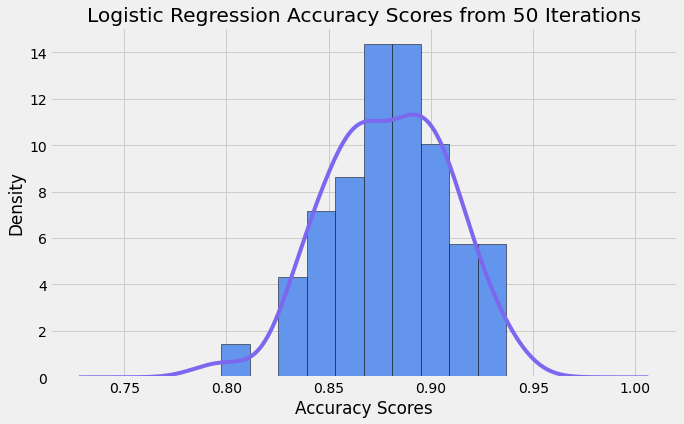

In [29]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10, 6))
plt.hist(LR_accuracy_scores, density = True, **kwargs_hist)
LR_accuracy_scores.plot(**kwargs_kde)
plt.title(f'Logistic Regression Accuracy Scores from {LR_iterations} Iterations')
plt.xlabel('Accuracy Scores')
plt.show()

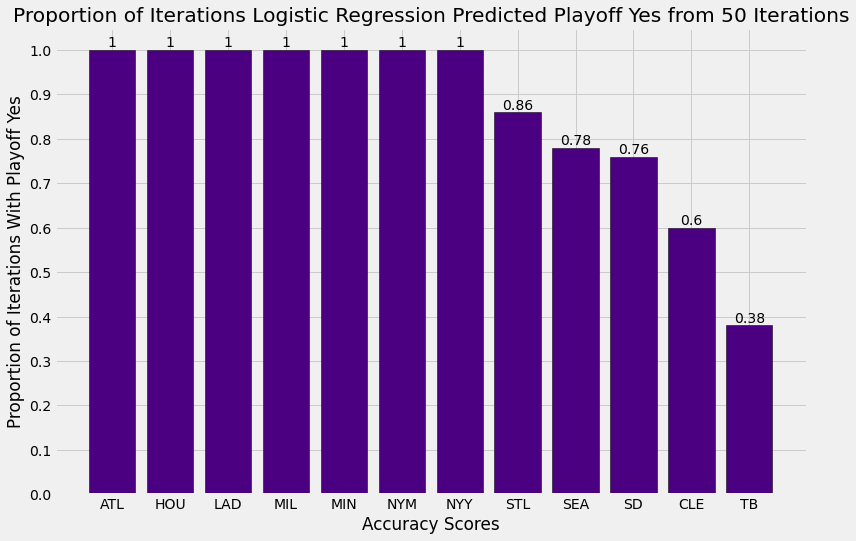

In [30]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12, 8))
plt.bar_label(plt.bar(range(len(LR_predictions)), LR_predictions, **kwargs_bar))
plt.title(f'Proportion of Iterations Logistic Regression Predicted Playoff Yes from {LR_iterations} Iterations')
plt.xlabel('Accuracy Scores')
plt.ylabel('Proportion of Iterations With Playoff Yes')
plt.xticks(range(len(LR_predictions)), LR_predictions.index.map(MLB_abr_map))
plt.yticks(np.arange(0, 1.1, step = 0.1))
plt.show()

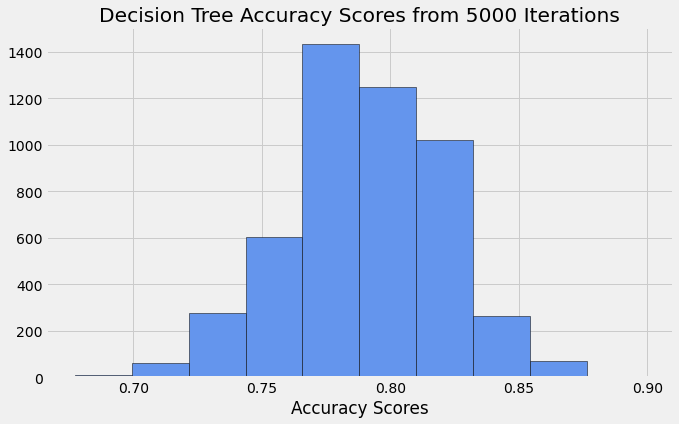

In [31]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10, 6))
plt.hist(DTC_accuracy_scores, **kwargs_hist)
plt.title(f'Decision Tree Accuracy Scores from {DTC_iterations} Iterations')
plt.xlabel('Accuracy Scores')
plt.show()

In [32]:
higher_DTC = DTC_predictions[round(DTC_predictions, 2) >= 0.01]

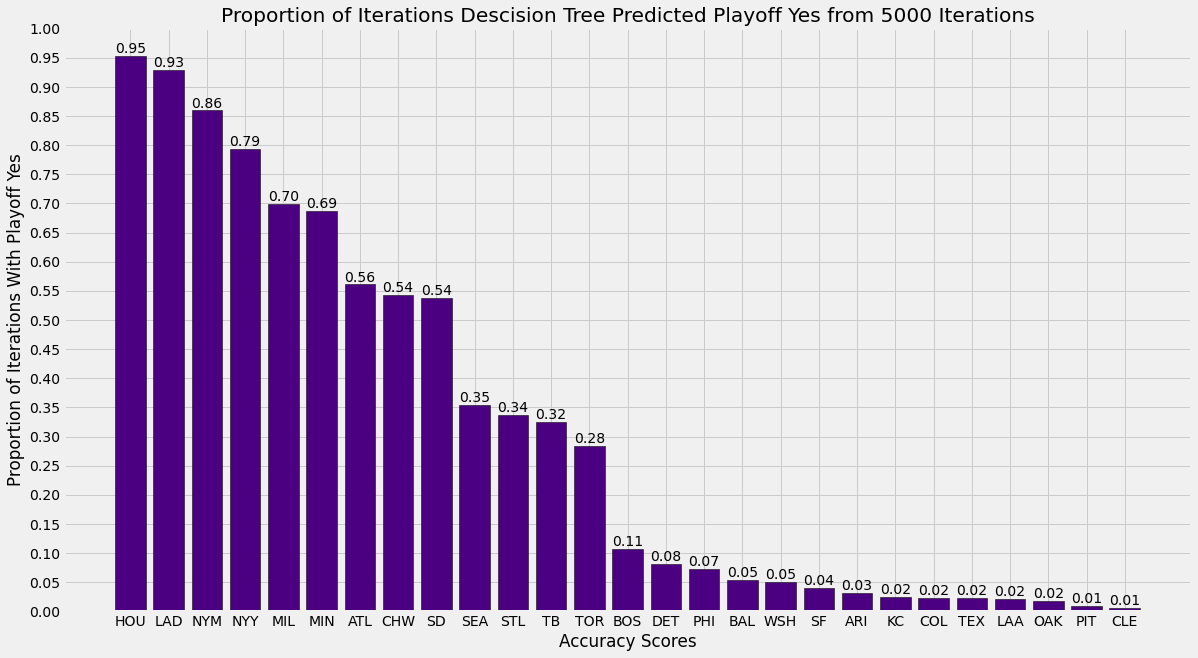

In [33]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (18, 10))
plt.bar_label(plt.bar(range(len(higher_DTC)), higher_DTC, **kwargs_bar), fmt = '%.2f')
plt.title(f'Proportion of Iterations Descision Tree Predicted Playoff Yes from {DTC_iterations} Iterations')
plt.xlabel('Accuracy Scores')
plt.ylabel('Proportion of Iterations With Playoff Yes')
plt.xticks(range(len(higher_DTC)), higher_DTC.index.map(MLB_abr_map))
plt.yticks(np.arange(0, 1.05, step = 0.05))
plt.show()

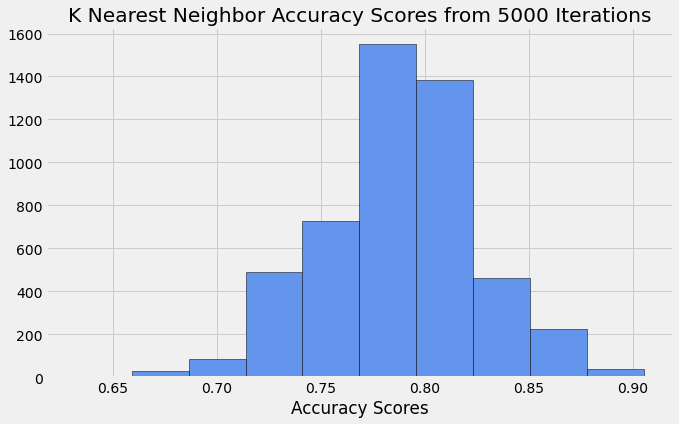

In [34]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10, 6))
plt.hist(KNN_accuracy_scores, **kwargs_hist)
plt.title(f'K Nearest Neighbor Accuracy Scores from {KNN_iterations} Iterations')
plt.xlabel('Accuracy Scores')
plt.show()

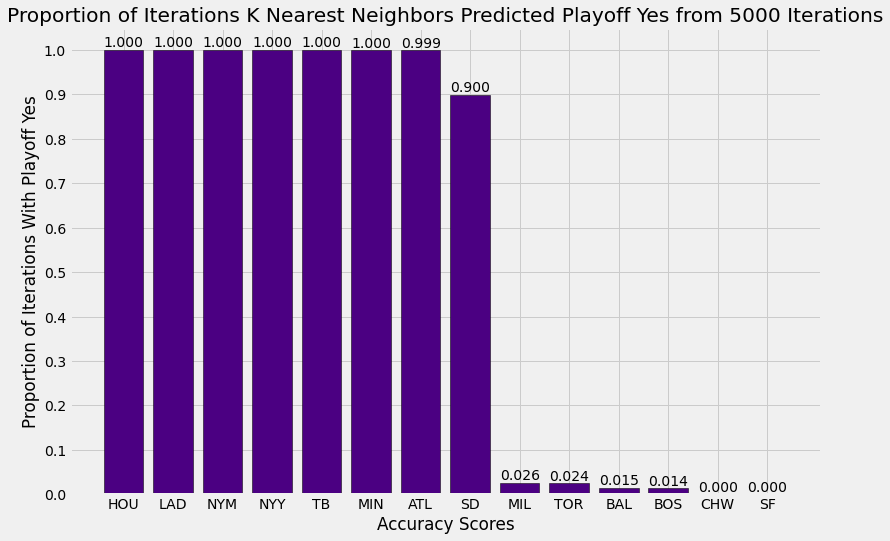

In [36]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12, 8))
plt.bar_label(plt.bar(range(len(KNN_predictions)), KNN_predictions, **kwargs_bar), fmt = '%.3f')
plt.title(f'Proportion of Iterations K Nearest Neighbors Predicted Playoff Yes from {KNN_iterations} Iterations')
plt.xlabel('Accuracy Scores')
plt.ylabel('Proportion of Iterations With Playoff Yes')
plt.xticks(range(len(KNN_predictions)), KNN_predictions.index.map(MLB_abr_map))
plt.yticks(np.arange(0, 1.1, step = 0.1))
plt.show()